# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [24]:
#Import your libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
#Load the dataset and explore its variables

data = pd.read_csv('./snsdata.csv')
data.head()

gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [3]:
#Your code here:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [4]:
data[['gender','sex']]

# Thought I could do something about the Gender Column (which has too many Null values), though it seems that the values there do not have any relation to the values from the Sex Column. 

gender  sex
0          M    0
1          F    0
2          M    0
3          F    0
4        NaN    1
...      ...  ...
29995      M    0
29996      M    0
29997      M    0
29998      M    0
29999      F    0

[30000 rows x 2 columns]

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

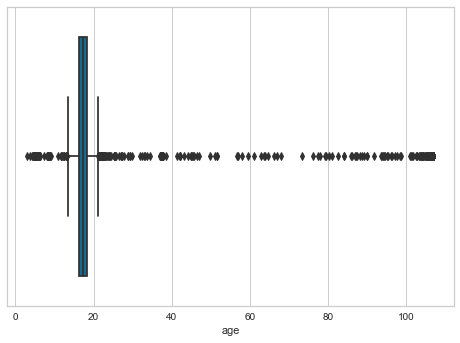

In [5]:
#Your code here:

sns.boxplot(data.age)

In [6]:
# Yeah well, because this study will focus solely on Teenagers, let's also drop people older than 24 (WHO's definition of Young People). 

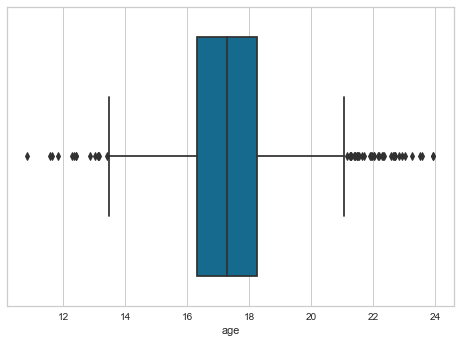

In [7]:
data = data[data.age >= 10]
data = data[data.age <= 24]

sns.boxplot(data.age)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24602 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      24602 non-null  int64  
 1   gender        23720 non-null  object 
 2   age           24602 non-null  float64
 3   friends       24602 non-null  int64  
 4   basketball    24602 non-null  int64  
 5   football      24602 non-null  int64  
 6   soccer        24602 non-null  int64  
 7   softball      24602 non-null  int64  
 8   volleyball    24602 non-null  int64  
 9   swimming      24602 non-null  int64  
 10  cheerleading  24602 non-null  int64  
 11  baseball      24602 non-null  int64  
 12  tennis        24602 non-null  int64  
 13  sports        24602 non-null  int64  
 14  cute          24602 non-null  int64  
 15  sex           24602 non-null  int64  
 16  sexy          24602 non-null  int64  
 17  hot           24602 non-null  int64  
 18  kissed        24602 non-nu

In [9]:
# As we can see, we get waaay less null values in our dataset by closing the age range. 
# Actually, let's drop the max age to 20. 

data = data[data.age <= 20]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24486 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      24486 non-null  int64  
 1   gender        23610 non-null  object 
 2   age           24486 non-null  float64
 3   friends       24486 non-null  int64  
 4   basketball    24486 non-null  int64  
 5   football      24486 non-null  int64  
 6   soccer        24486 non-null  int64  
 7   softball      24486 non-null  int64  
 8   volleyball    24486 non-null  int64  
 9   swimming      24486 non-null  int64  
 10  cheerleading  24486 non-null  int64  
 11  baseball      24486 non-null  int64  
 12  tennis        24486 non-null  int64  
 13  sports        24486 non-null  int64  
 14  cute          24486 non-null  int64  
 15  sex           24486 non-null  int64  
 16  sexy          24486 non-null  int64  
 17  hot           24486 non-null  int64  
 18  kissed        24486 non-nu

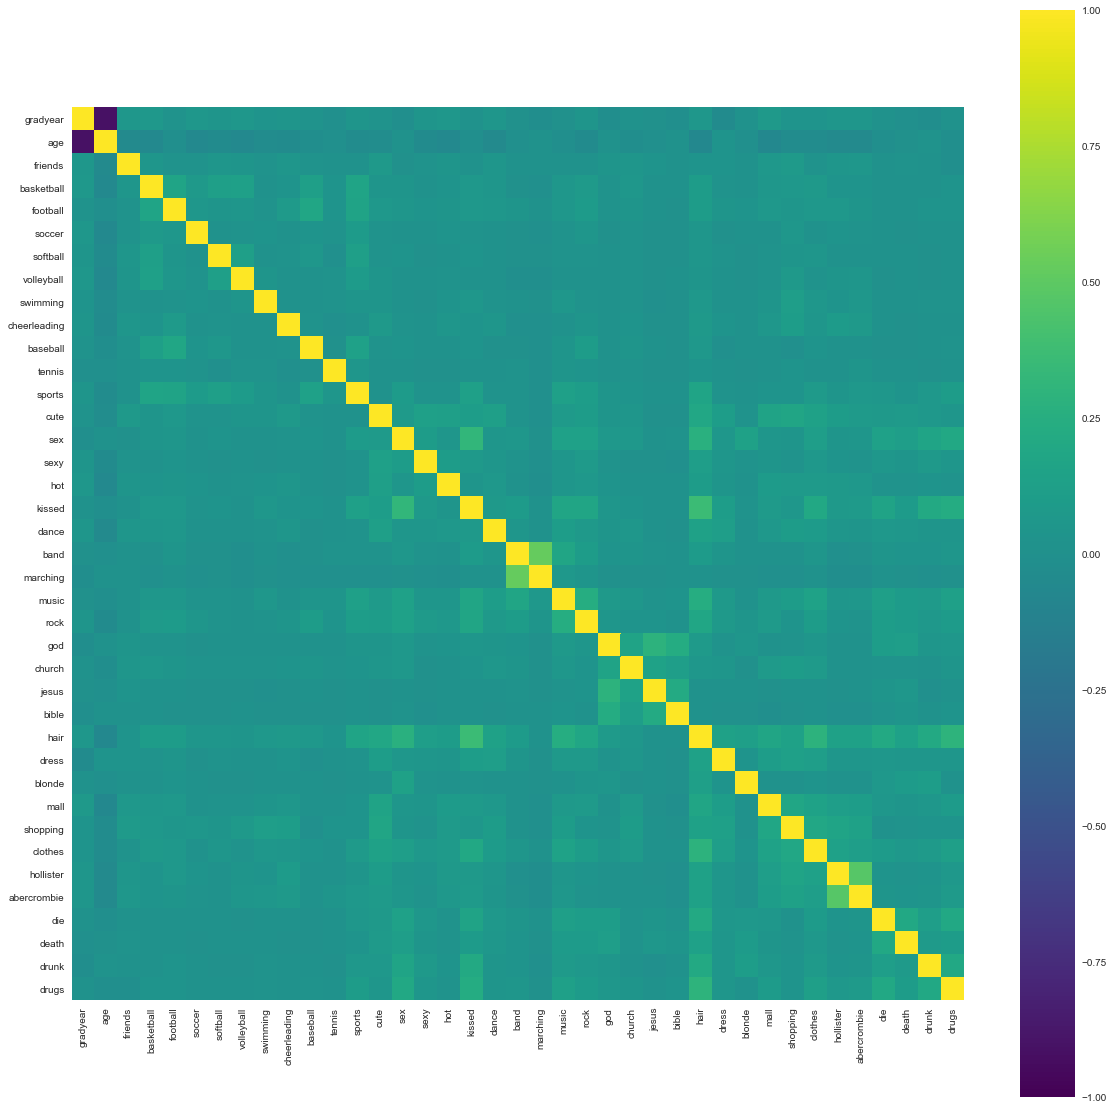

In [10]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=False, square=True, cmap='viridis', vmin=-1, vmax=1)

In [11]:
# Age and Graduation Year are perfectly (and negatively) correlated. Also, Band y March seem to be somewhat positevely correlated. 

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [15]:
#Your code here:

data_dum = pd.get_dummies(data.gender, drop_first=True)
data_analysis = pd.concat([data, data_dum], axis=1)
data_analysis.drop('gender', axis=1, inplace =True)

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

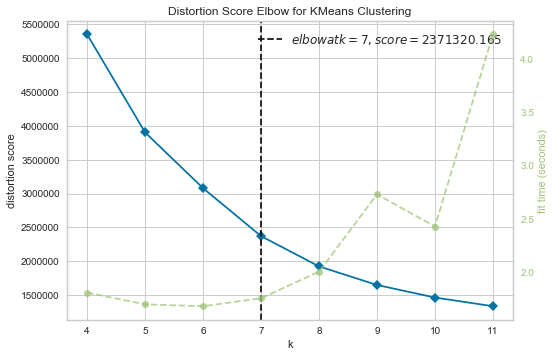

In [17]:
# Let's Try KMEANS first

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(data_analysis)
visualizer.poof()

In [22]:
# As we can observe, 7 is the optimal amount of Cluster the KMEANS Model should have. 

# Now let's Scale the Dataset. 
scaler = StandardScaler() 
data_scale = pd.DataFrame(scaler.fit_transform(data_analysis))

# Running the Model
kmeans = KMeans(n_clusters=7)

# Applying the model to the scaled data
clustered_data = kmeans.fit(data_scale) 

data_analysis['KMEANS_labels']= clustered_data.labels_

In [29]:
# Now DBSCAN.  

dbscan_model = DBSCAN(eps=0.7)

# Applying the model to the scaled data
dbscan_model.fit(data_scale)

data_analysis['DBSCAN_labels'] = dbscan_model.labels_

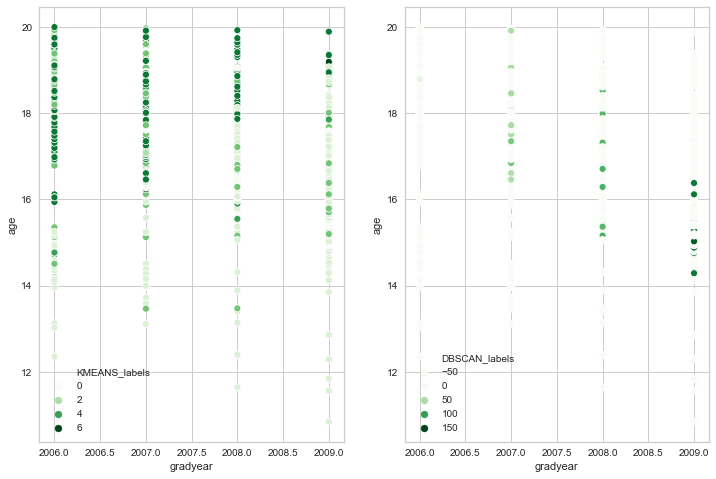

In [30]:
# And plot. 

f, axes = plt.subplots(1, 2, figsize=(12,8)) 

sns.scatterplot(y="age", x= "gradyear", hue="KMEANS_labels", data=data_analysis, ax=axes[0], palette = "Greens")
sns.scatterplot(y="age", x= "gradyear", hue="DBSCAN_labels", data=data_analysis, ax=axes[1], palette = "Greens")

In [32]:
data_analysis.groupby('KMEANS_labels').mean()

gradyear        age    friends  basketball  football  \
KMEANS_labels                                                            
0              2007.620075  17.089834  32.057223    0.676360  0.609756   
1              2008.474917  16.245435  34.202377    0.293795  0.204891   
2              2007.376543  17.373401  34.427984    0.199588  0.347737   
3              2007.352871  17.466151  24.320467    0.303550  0.462473   
4              2007.805589  16.911750  43.433779    0.447145  0.461725   
5              2006.520114  18.193046  29.059429    0.176343  0.165714   
6              2007.394673  17.331392  37.053269    0.401937  0.266344   

                 soccer  softball  volleyball  swimming  cheerleading  ...  \
KMEANS_labels                                                          ...   
0              0.469981  0.342402    0.239212  0.294559      0.241088  ...   
1              0.269341  0.229688    0.213804  0.158953      0.135984  ...   
2              0.152263  0.187243    0.113169  0.154321      0.057613  ...   
3              0.210388  0.008101    0.032166  0.069574      0.006195  ...   
4              0.328068  0.226002    0.308627  0.264885      0.349939  ...   
5              0.159886  0.153829    0.106743  0.112343      0.097829  ...   
6              0.266344  0.157385    0.176755  0.164649      0.108959  ...   

               shopping   clothes  hollister  abercrombie       die     death  \
KMEANS_labels                                                                   
0              0.626642  0.791745   0.111632     0.106942  1.075047  0.493433   
1              0.413553  0.136213   0.028111     0.014627  0.148097  0.098046   
2              0.362140  0.168724   0.010288     0.008230  0.176955  0.139918   
3              0.040267  0.051465   0.010960     0.008578  0.142244  0.080295   
4              1.055893  0.453220   1.374241     1.102066  0.198056  0.161604   
5              0.373943  0.109371   0.019543     0.011429  0.134400  0.097714   
6              0.360775  0.174334   0.038741     0.026634  0.331719  0.239709   

                  drunk     drugs         M  DBSCAN_labels  
KMEANS_labels                                               
0              0.701689  0.848968  0.117261      -1.000000  
1              0.057365  0.025254  0.002743      11.940121  
2              0.057613  0.041152  0.203704      -1.000000  
3              0.052895  0.023350  0.998332      10.409340  
4              0.108141  0.061968  0.085055      -1.000000  
5              0.069143  0.024229  0.000229       4.429029  
6              0.118644  0.087167  0.193705      -1.000000  

[7 rows x 41 columns]

In [33]:
data_analysis.groupby('DBSCAN_labels').mean()

gradyear        age    friends  basketball  football  \
DBSCAN_labels                                                            
-1             2007.515573  17.220184  33.015031    0.315554  0.303303   
 0             2006.000000  18.707286  17.357143    0.000000  0.000000   
 1             2006.000000  18.690486  17.622356    0.000000  0.000000   
 2             2006.000000  18.730394  17.180851    0.000000  0.000000   
 3             2006.000000  18.715400   8.800000    0.000000  0.000000   
...                    ...        ...        ...         ...       ...   
 144           2009.000000  15.860833  10.166667    0.000000  0.000000   
 145           2009.000000  15.622429  29.285714    0.000000  0.000000   
 146           2009.000000  15.696882   8.176471    0.000000  0.000000   
 147           2009.000000  15.939200  50.600000    0.000000  0.000000   
 148           2009.000000  15.584400   4.400000    0.000000  0.000000   

                 soccer  softball  volleyball  swimming  cheerleading  ...  \
DBSCAN_labels                                                          ...   
-1             0.263346  0.192291    0.168308  0.156481      0.126231  ...   
 0             0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 1             0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 2             0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 3             0.000000  0.000000    0.000000  0.000000      0.000000  ...   
...                 ...       ...         ...       ...           ...  ...   
 144           0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 145           0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 146           0.000000  0.000000    0.000000  0.000000      0.000000  ...   
 147           1.000000  0.000000    0.000000  0.000000      0.000000  ...   
 148           0.000000  0.000000    0.000000  0.000000      0.000000  ...   

               shopping   clothes  hollister  abercrombie       die     death  \
DBSCAN_labels                                                                   
-1             0.411629  0.175658   0.081704     0.061254  0.214154  0.134759   
 0             0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 1             0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 2             0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 3             0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
...                 ...       ...        ...          ...       ...       ...   
 144           0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 145           0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 146           0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 147           0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   
 148           0.000000  0.000000   0.000000     0.000000  0.000000  0.000000   

                  drunk     drugs         M  KMEANS_labels  
DBSCAN_labels                                               
-1             0.105263  0.072704  0.180653       2.881921  
 0             0.000000  0.000000  1.000000       3.000000  
 1             0.000000  0.000000  0.000000       5.000000  
 2             0.000000  0.000000  0.000000       5.000000  
 3             0.000000  0.000000  0.000000       5.000000  
...                 ...       ...       ...            ...  
 144           0.000000  0.000000  1.000000       3.000000  
 145           0.000000  0.000000  0.000000       1.000000  
 146           0.000000  0.000000  0.000000       1.000000  
 147           0.000000  0.000000  0.000000       1.000000  
 148           0.000000  0.000000  0.000000       1.000000  

[150 rows x 41 columns]